In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.utils import to_categorical
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.losses import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler,Callback
from PIL import Image
import warnings
import os
import cv2
from io import StringIO
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import glob
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import torch
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
from keras.engine import Layer,InputSpec
from keras.utils import conv_utils
import csv
from keras_flops import get_flops
#sess = tf.compat.v1.keras.backend.get_session()
#array = sess.run(your_tensor)
#tf.enable_eager_execution()

ModuleNotFoundError: ignored

In [ ]:
!pip install keras_flops

# Prop5

In [ ]:
#proposed model (aspp->concatenate) 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K

#proposed model (concatenate -> aspp -> self attention)
#proposed model (concatenate -> aspp -> self attention)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import tensorflow as tf


def self_attention(b5):
    w,x,y,z = b5.shape
    z1=int(z/8)
    query = Conv2D(z1, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(b5)            #can change the factor to divide 
    key = Conv2D(z1, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(b5)
    value = Conv2D(z, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(b5)

    query = Reshape([x*y, z1])(query)
    key = Reshape([z1, x*y])(key)
    value = Reshape([z, x*y])(value)

    prod = Dot(axes = 2)([query,Permute(dims = (2,1))(key)])
    w = z1**-2
    prod = Lambda(lambda x: x * w)(prod)
    prod = Softmax()(prod)
    
    attention = Dot(axes = 2)([value,Permute(dims = (2,1))(prod)])
    attention = Reshape([x,y,z])(attention)
    #attention gate to be added instead of add
    attention = Add()([attention,b5])
    return(attention)


def siam_model(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    #conv1 = self_attention(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    #conv2 = self_attention(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    #conv3 = self_attention(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    #conv3 = self_attention(conv3)
    #pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    #conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    #conv4 = Dropout(0.2)(conv4)
    #conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    #pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    #conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    #conv5 = Dropout(0.2)(conv5)
    #conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    #conv1_x = self_attention(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    #conv2_x = self_attention(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    #conv3_x = self_attention(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    #conv3_x = self_attention(conv3_x)
    #pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    #conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    #conv4_x = Dropout(0.2)(conv4_x)
    #conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    #pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    #conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    #conv5_x = Dropout(0.2)(conv5_x)
    #conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    
    CONV5 = Concatenate(name = 'concat')([conv3, conv3_x])

    #aspp
    #rate 6
    CONV5 = self_attention(CONV5)
    
    b1 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    b6 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b6' )(CONV5)
    b6 = Dropout(0.5)(b6)

    #rate 12
    b2 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(512, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(512, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)
    
    b7 = Conv2D(512, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b7' )(CONV5)
    b7 = Dropout(0.5)(b7)

    b5 = Add()([b1, b2, b3, b4, b6, b7])

    #self
    ''''
    query = Conv2D(64, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'query')(b5)            #can change the factor to divide 
    key = Conv2D(64, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'key')(b5)
    value = Conv2D(512, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'value')(b5)

    query = Reshape([64*64, 64], name = 'reshape_q')(query)
    key = Reshape([64, 64*64], name = 'reshape_k')(key)
    value = Reshape([512, 64*64], name = 'reshape_v')(value)
    print(key.shape)
    prod = Dot(axes = 2)([query,Permute(dims = (2,1))(key)])
    print(prod.shape)
    #prod = tf.linalg.matmul(query,key)
    #print(prod.shape)

    prod = Lambda(lambda x: x * 0.125)(prod)
    prod = Softmax(name = 'soft')(prod)
    
    attention = Dot(axes = 2)([value,Permute(dims = (2,1))(prod)])
    print(attention.shape)
    #attention = tf.linalg.matmul(value, prod)
    #attention = Dot(axes = [2,1])([prod,K.transpose(value)])
    attention = Reshape([64,64,512], name = 'attention')(attention)
    print(attention.shape)
    '''
    #attention = self_attention(b5)
    #changed the kernel size to 3*3 from 2*2, added one extra conv also

    #up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(b5))
    #up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    #up12 = Dropout(0.2)(up12)
    #up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)

    
    up21 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(b5))
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)

    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Softmax()(Conv2D(2, 1, padding = 'same', kernel_initializer = 'he_normal')(up43))
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

proposedattention = siam_model((512,512,3))

flops4 = get_flops(proposedattention, batch_size=1)
print(f"FLOPS: {flops4 / 10 ** 9:.03} G")
print(flops4)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 512, 512, 64) 1792        input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_104 (Conv2D)             (None, 512, 512, 64) 1792        input_8[0][0]                    
____________________________________________________________________________________________

# Concatenation -> ASPP -> Self Attention

In [ ]:
#proposed model (concatenate -> aspp -> self attention)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import tensorflow as tf



def final(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    #pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    #conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    #conv4 = Dropout(0.2)(conv4)
    #conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    #pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    #conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    #conv5 = Dropout(0.2)(conv5)
    #conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    #pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    #conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    #conv4_x = Dropout(0.2)(conv4_x)
    #conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    #pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    #conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    #conv5_x = Dropout(0.2)(conv5_x)
    #conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    CONV5 = Concatenate(name = 'concat')([conv3, conv3_x])

    #aspp
    #rate 6
    b1 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    b6 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b6' )(CONV5)
    b6 = Dropout(0.5)(b6)

    #rate 12
    b2 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(512, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(512, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)
    
    b7 = Conv2D(512, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b7' )(CONV5)
    b7 = Dropout(0.5)(b7)

    b5 = Add(name = 'add')([b1, b2, b3, b4, b6, b7])

    #self
    query = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'query')(b5)            #can change the factor to divide 
    key = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'key')(b5)
    value = Conv2D(512, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'value')(b5)

    query = Reshape([128*128, 64], name = 'reshape_q')(query)
    key = Reshape([64, 128*128], name = 'reshape_k')(key)
    value = Reshape([512, 128*128], name = 'reshape_v')(value)

    prod = tf.linalg.matmul(query,key)
    prod = prod*(64**-0.5)
    prod = Softmax(name = 'soft')(prod)

    attention = tf.linalg.matmul(value, prod)
    attention = Reshape([128,128,512], name = 'attention')(attention)

    attention = Add(name= 'add_1')([attention,b5])

    #changed the kernel size to 3*3 from 2*2, added one extra conv also

    #up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(b5))
    #up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    #up12 = Dropout(0.2)(up12)
    #up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)

    up21 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(attention))
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)

    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

finalproposed = final((1024,1024,3))
finalproposed.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//attention//aspp_attention50_again.h5')

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1024, 1024, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 1024, 1024, 6 1792        input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//FinalProposedASPP_SelfAttention//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = finalproposed.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_7.png
//content//drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Final Proposed with Self-Attention ASPP ','attention//aspp_attention50_again.h5','Wcceloss','New Custom','No',50,f1,precision,recall,kappa,jaccard,accuracy],
        ['Final Proposed with Self-Attention ASPP ','attention//aspp_attention50_again.h5','Wcceloss','New Custom','Yes',50,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Proposed Original

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K



def siam_model(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    conv5_x = Dropout(0.2)(conv5_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    CONV5 = Concatenate()([conv5, conv5_x])
    up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(CONV5))
    up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    up12 = Dropout(0.2)(up12)
    up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)
    up21 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up13))
    up22 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    up32 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    up42 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    #print(model.summary())
    return model
proposedoriginal = siam_model((1024,1024,3))
proposedoriginal.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//models//proposed70.h5')

In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//proposedoriginal//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposedoriginal.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_7.png
//content//drive

In [ ]:
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Proposed Original ','models//proposed70.h5','Wcceloss','New Custom','No',70,f1,precision,recall,kappa,jaccard,accuracy],
        ['Proposed Original ','models//proposed70.h5','Wcceloss','New Custom','Yes',70,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Proposed Original plus skip

In [ ]:
#proposed model with add and skip
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K


def modelDef(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    conv5_x = Dropout(0.2)(conv5_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    #model_2 = Model(inputs = input_2,outputs = conv5_x)

    CONV1 = add([conv1, conv1_x])
    CONV2 = add([conv2, conv2_x])
    CONV3 = add([conv3, conv3_x])
    CONV4 = add([conv4, conv4_x])
    CONV5 = Concatenate()([conv5, conv5_x])
    up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(CONV5))
    merge1 = Concatenate()([CONV4,up11])
    up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up12 = Dropout(0.2)(up12)
    up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)
    up21 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up13))
    merge2 = Concatenate()([CONV3,up21])
    up22 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge2)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    merge3 = Concatenate()([CONV2,up31])
    up32 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge3)
    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    merge4 = Concatenate()([CONV1,up41])
    up42 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge4)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    

    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

#socalledproposed = ourmodel((640,1024,3))
proposedwithskip = ourmodel((1024,1024,3))
proposedwithskip.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//models//proposedadd70.h5')

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 1024, 1024, 6 1792        input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_105 (Conv2D)             (None, 1024, 1024, 6 1792        input_8[0][0]                    
_______________________________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//proposedoriginalplusadd//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposedwithskip.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_7.png
//content//drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Proposed Original plus add','models//proposedadd70.h5','Wcceloss','New Custom','No',70,f1,precision,recall,kappa,jaccard,accuracy],
        ['Proposed Original plus add','models//proposedadd70.h5','Wcceloss','New Custom','Yes',70,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Proposed Original plus ASPP dr = {6, 12, 18, 24}

In [ ]:
#proposed model (concatenate -> aspp)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K



def siam_model(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    conv5_x = Dropout(0.2)(conv5_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    CONV5 = Concatenate(name = 'concat')([conv5, conv5_x])

    #aspp
    #rate 6
    b1 = Conv2D(1024, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    #rate 12
    b2 = Conv2D(1024, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(1024, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(1024, 3, dilation_rate=(24, 24), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)

    b5 = Add(name = 'add')([b1, b2, b3, b4])

    up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(b5))
    up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    up12 = Dropout(0.2)(up12)
    up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)
    up21 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up13))
    up22 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    up32 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    up42 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

proposedplusASPP = siam_model((1024,1024,3))
proposedplusASPP.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//atrous//proposed_con_aspp_70.h5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1024, 1024, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 1024, 1024, 6 1792        input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]

def crops(a, crop_size = 512): 
    croped_images = []    
    for i in range(2):
        for j in range(2):
            crop_x = a[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size]
            croped_images.append(crop_x)
        
    return croped_images
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_"
savepred = "//content//drive//My Drive//CD_LEVIR_NEW//results//fcn//prop3_6"

#listofimages = glob.glob('//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//*.png')
listofimages = ['test_12.png']
print(len(listofimages))

for eg in listofimages:
  imageA = addA + eg.split('_')[-1]#str(eg) + ".png"
  imageB = addB + eg.split('_')[-1]#str(eg) + ".png"
  GT = addlabel + eg.split('_')[-1]#str(eg) + ".png"
  print(eg.split('_')[-1])
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposedplusASPP.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cropped = crops(result)
  gtappend.append(cv2.imread(GT,0))
  for i in range(4):
        a = Image.fromarray(cropped[i])
        cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])
  '''
  #cv2.imwrite(savepred+'pred_test_'+eg.split('_')[-1],result)
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred+'gt_test_'+eg.split('_')[-1],cv2.imread(GT,0))
  predappend.append(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)



#withoutskipvalresults
#e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
print(np.unique(g),np.unique(p))
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)'''

1
12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_12.png


In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//proposedplusASPP//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposedplusASPP.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_7.png
//content//drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Proposed Original plus ASPP','atrous//proposed_con_aspp_70','Wcceloss','New Custom','No',70,f1,precision,recall,kappa,jaccard,accuracy],
        ['Proposed Original plus ASPP','atrous//proposed_con_aspp_70','Wcceloss','New Custom','Yes',70,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Proposed Original plus ASPP dr = {4, 8, 12, 16}

In [ ]:
#proposed model (concatenate -> aspp)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K



def siam_model(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    conv5_x = Dropout(0.2)(conv5_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    CONV5 = Concatenate(name = 'concat')([conv5, conv5_x])

    #aspp
    #rate 6
    b1 = Conv2D(1024, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    #rate 12
    b2 = Conv2D(1024, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(1024, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(1024, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)

    b5 = Add(name = 'add')([b1, b2, b3, b4])

    up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(b5))
    up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    up12 = Dropout(0.2)(up12)
    up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)
    up21 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up13))
    up22 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    up32 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    up42 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

proposedaspp = siam_model((1024,1024,3))
proposedaspp.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//atrous//proposed_con_aspp_100.h5')

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_161 (Conv2D)             (None, 1024, 1024, 6 1792        input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_171 (Conv2D)             (None, 1024, 1024, 6 1792        input_12[0][0]                   
______________________________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//proposedaspp_4_8_12_16//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposedaspp.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_7.png
//content//drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Proposed Original plus ASPP(4,8,12,16)','atrous//proposed_con_aspp_100','Wcceloss','New Custom','No',100,f1,precision,recall,kappa,jaccard,accuracy],
        ['Proposed Original plus ASPP(4,8,12,16)','atrous//proposed_con_aspp_100','Wcceloss','New Custom','Yes',100,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Proposed Original plus ASPP^2 before concatenate

In [ ]:
#proposed model (aspp->concatenate) 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K



def double_atrous_siam_model(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)

    #aspp
    #rate 6
    b1 = Conv2D(512, 3, dilation_rate=(2, 2), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(conv5)
    b1 = Dropout(0.5)(b1)

    #rate 12
    b2 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b2' )(conv5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b3' )(conv5)
    b3 = Dropout(0.5)(b3)

    #rate 6
    b4 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b4' )(conv5)
    b4 = Dropout(0.5)(b4)

    b5 = Add(name = 'add')([b1, b2, b3, b4])
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    conv5_x = Dropout(0.2)(conv5_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)

    #aspp
    #rate 6
    b1_x = Conv2D(512, 3, dilation_rate=(2, 2), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1_x' )(conv5_x)
    b1_x = Dropout(0.5)(b1_x)

    #rate 12
    b2_x = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b2_x' )(conv5_x)
    b2_x = Dropout(0.5)(b2_x)

    #rate 18
    b3_x = Conv2D(512, 3, dilation_rate=(6,6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b3_x' )(conv5_x)
    b3_x = Dropout(0.5)(b3_x)

    #rate 6
    b4_x = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b4_x' )(conv5_x)
    b4_x = Dropout(0.5)(b4_x)

    b5_x = Add(name = 'add_x')([b1_x, b2_x, b3_x, b4_x])
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    CONV5 = Concatenate()([b5, b5_x])
    up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(CONV5))
    up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    up12 = Dropout(0.2)(up12)
    up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)
    up21 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up13))
    up22 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    up32 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    up42 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

atrousbeforeconcatenate = double_atrous_siam_model((1024,1024,3))
atrousbeforeconcatenate.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//atrous//atrousrahasya75.h5')

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 1024, 1024, 6 1792        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 1024, 1024, 6 1792        input_6[0][0]                    
_______________________________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//atrousbeforeconcatenate//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = atrousbeforeconcatenate.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_7.png
//content//drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['atrous befor econcatenate(6,12,18,24)','atrous//atrousbeforeconcatenate','Wcceloss','New Custom','No',75,f1,precision,recall,kappa,jaccard,accuracy],
        ['atrous before concatenate(6,12,18,24)','atrous//atrousbeforeconcatenate','Wcceloss','New Custom','Yes',75,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Unet

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K


def unet(input_size):
    input1 = Input(input_size)
    input2 = Input(input_size)
    first = Concatenate()([input1, input2])

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(first)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(2, 1, activation = 'softmax')(conv9)
    
    model = Model(inputs=[input1,input2],outputs=[conv10])
   

    return model

h1=unet((1024,1024,3))
h1.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//models//matched_wcce_70_unet.h5")

In [ ]:
gtappend = []
predappend =[]
erodappend=[]

def crops(a, crop_size = 512): 
    croped_images = []    
    for i in range(2):
        for j in range(2):
            crop_x = a[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size]
            croped_images.append(crop_x)
        
    return croped_images
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//results//fcn//unet_"
listofimages = glob.glob(addA+'*.png')

listofimages = ['test_12.png','test_2.png','test_16.png','test_20.png']

for eg in listofimages:
  imageA = addA + eg.split('_')[-1]#str(eg) + ".png"
  imageB = addB + eg.split('_')[-1]#str(eg) + ".png"
  GT = addlabel + eg.split('_')[-1]#str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = h1.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cropped = crops(result)
  gtappend.append(cv2.imread(GT,0))
  for i in range(4):
        a = Image.fromarray(cropped[i])
        cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])
  
  #for i in range(4):
        #a = Image.fromarray(cropped[i])
  #     cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])
  #cv2.imwrite(savepred+eg.split('_')[-1]+"_0.png",result)
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  '''
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
#e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)'''

//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_20.png


In [ ]:
import csv
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//test_results//scoresforpaper.csv"
head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
#data = [['Unet ','models//matched_wcce_70_unet.h5','Wcceloss','New Custom','No',70,f1,precision,recall,kappa,jaccard,accuracy],
#        ['Unet ','models//matched_wcce_70_unet.h5','Wcceloss','New Custom','Yes',70,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'w') as f:
    writer = csv.writer(f)
    writer.writerows(head)

In [ ]:
import csv
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//test_results//scoresforpaper.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Unet ','models//matched_wcce_70_unet.h5','Wcceloss','Test','No',70,f1,precision,recall,kappa,jaccard,accuracy]]
#        ['Unet ','models//matched_wcce_70_unet.h5','Wcceloss','New Custom','Yes',70,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Pre Enhancement

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K


def unet(input_size):
    input1 = Input(input_size)
    input2 = Input(input_size)
    first = Concatenate()([input1, input2])

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(first)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(2, 1, activation = 'softmax')(conv9)
    
    model = Model(inputs=[input1,input2],outputs=[conv10])
   

    return model

h1=unet((1024,1024,3))
h1.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//models//pre-enhancement.h5")

In [ ]:
gtappend = []
predappend =[]
erodappend=[]

def crops(a, crop_size = 512): 
    croped_images = []    
    for i in range(2):
        for j in range(2):
            crop_x = a[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size]
            croped_images.append(crop_x)
        
    return croped_images
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_"
savepred = "//content//drive//My Drive//CD_LEVIR_NEW//results//no_matching//pre_enhance_unet"

#listofimages = glob.glob('//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//*.png')
listofimages = ['test_12.png','test_2.png','test_16.png','test_20.png']
print(len(listofimages))

for eg in listofimages:
  imageA = addA + eg.split('_')[-1]#str(eg) + ".png"
  imageB = addB + eg.split('_')[-1]#str(eg) + ".png"
  GT = addlabel + eg.split('_')[-1]#str(eg) + ".png"
  print(eg.split('_')[-1])
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = h1.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cropped = crops(result)
  gtappend.append(cv2.imread(GT,0))
  for i in range(4):
        a = Image.fromarray(cropped[i])
        cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])
  '''
  #cv2.imwrite(savepred+'pred_test_'+eg.split('_')[-1],result)
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred+'gt_test_'+eg.split('_')[-1],cv2.imread(GT,0))
  predappend.append(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)



#withoutskipvalresults
#e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
print(np.unique(g),np.unique(p))
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)'''

4
12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_12.png
2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_2.png
16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_16.png
20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_20.png


In [ ]:
cd //content//drive//My Drive//CD_LEVIR_NEW//Matched//test//A

[Errno 2] No such file or directory: '//content//drive//My Drive//CD_LEVIR_NEW//Matched//test//A'
/content


In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Pre Enhancement ','models//pre-enhancement.h5','Wcceloss','New Custom','No',70,f1,precision,recall,kappa,jaccard,accuracy],
        ['Pre Enhancement ','models//pre-enhancement.h5','Wcceloss','New Custom','Yes',70,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Unet++

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K




def conv_block(input_layer, in_chl):
  conv1 = Conv2D(in_chl, 3, activation = 'selu', padding = 'same', kernel_initializer = 'he_normal')(input_layer)
  b_norm1 = BatchNormalization()(conv1)
  conv2 = Conv2D(in_chl, 3, activation = 'selu', padding ='same', kernel_initializer = 'he_normal')(b_norm1)
  b_norm2 = BatchNormalization()(conv2)
  out = Add()([conv1,b_norm2])
  return(out)

def unet(input_size):
  input1 = Input(input_size)
  input2 = Input(input_size)
  firstlayer = concatenate([input1, input2], name = "firstlayer", axis =-1)

  unit_00 = conv_block(firstlayer, 32)
  pool_00 = MaxPooling2D(pool_size = (2,2), strides = 2, name = "pool_00" )(unit_00)

  unit_10 = conv_block(pool_00, 64)
  pool_10 = MaxPooling2D(pool_size = (2,2), strides = 2, name = "pool_10")(unit_10)
  upsp_10 = Conv2DTranspose(32, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_10")(unit_10)  

  unit_20 = conv_block(pool_10, 128)
  pool_20 = MaxPooling2D(pool_size = (2,2), strides = 2, name = "pool_20")(unit_20)
  upsp_20 = Conv2DTranspose(64, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_20")(unit_20)

  unit_30 = conv_block(pool_20, 256)
  pool_30 = MaxPooling2D(pool_size = (2,2), strides = 2, name = "pool_30")(unit_30)
  upsp_30 = Conv2DTranspose(128, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_30")(unit_30)

  unit_40 = conv_block(pool_30, 512)
  upsp_40 = Conv2DTranspose(256, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_40")(unit_40)

  conc_01 = concatenate([unit_00, upsp_10], axis = 3, name = "conc_01")
  unit_01 = conv_block(conc_01, 32)
  outt_01 = Conv2D(1, 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal', name = "outt_01")(unit_01)

  conc_11 = concatenate([unit_10, upsp_20], axis = 3, name = "conc_11")
  unit_11 = conv_block(conc_11, 64)
  upsp_11 = Conv2DTranspose(32, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_11")(unit_11)

  conc_21 = concatenate([unit_20, upsp_30], axis = 3, name = "conc_21")
  unit_21 = conv_block(conc_21, 128)
  upsp_21 = Conv2DTranspose(64, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_21")(unit_21)

  conc_31 = concatenate([unit_30, upsp_40], axis = 3, name = "conc_31")
  unit_31 = conv_block(conc_31, 256)
  upsp_31 = Conv2DTranspose(128, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_31")(unit_31)

  conc_02 = concatenate([unit_00, unit_01, upsp_11], axis = 3, name = "conc_02")
  unit_02 = conv_block(conc_02, 32)
  outt_02 = Conv2D(1, 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal', name = "outt_02")(unit_02)

  conc_12 = concatenate([unit_10, unit_11, upsp_21], axis = 3, name = "conc_12")
  unit_12 = conv_block(conc_12, 64)
  upsp_12 = Conv2DTranspose(32, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_12")(unit_12)

  conc_22 = concatenate([unit_20, unit_21, upsp_31], axis= 3, name = "conc_22")
  unit_22 = conv_block(conc_22, 128)
  upsp_22 = Conv2DTranspose(64, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_22")(unit_22)

  conc_03 = concatenate([unit_00, unit_01, unit_02, upsp_12], axis = 3, name = "conc_03")
  unit_03 = conv_block(conc_03, 32)
  outt_03 = Conv2D(1, 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal', name = "outt_03")(unit_03)

  conc_13 = concatenate([unit_10, unit_11, unit_12, upsp_22], axis = 3, name = "conc_13")
  unit_13 = conv_block(conc_13, 64)
  upsp_13 = Conv2DTranspose(32, 3, strides = (2, 2), activation = 'selu', padding = 'same', kernel_initializer = 'he_normal', name = "upsp_13")(unit_13)

  conc_04 = concatenate([unit_00, unit_01, unit_02, unit_03, upsp_13], axis = 3, name = "conc_04")
  unit_04 = conv_block(conc_04, 32)
  outt_04 = Conv2D(1, 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal', name = "outt_04")(unit_04)

  conc_final = concatenate([outt_01, outt_02, outt_03, outt_04], axis = 3, name = "conc_final")
  final_out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal', name = "final_out")(conc_final)

  model = Model(inputs = [input1, input2], outputs = final_out)
  return model

otherunetmodel = unet((1024,1024,3))
otherunetmodel.summary()
otherunetmodel.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//models//unet++_10epochs.h5")

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
firstlayer (Concatenate)        (None, 1024, 1024, 6 0           input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 1024, 1024, 3 1760        firstlayer[0][0]           

In [ ]:
gtappend = []
predappend =[]
erodappend=[]

def crops(a, crop_size = 512): 
    croped_images = []    
    for i in range(2):
        for j in range(2):
            crop_x = a[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size]
            croped_images.append(crop_x)
        
    return croped_images
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_"
savepred = "//content//drive//My Drive//CD_LEVIR_NEW//results//unet++_new//"

#listofimages = glob.glob('//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//*.png')
listofimages = ['test_12.png','test_2.png','test_16.png','test_20.png']
print(len(listofimages))

for eg in listofimages:
  imageA = addA + eg.split('_')[-1]#str(eg) + ".png"
  imageB = addB + eg.split('_')[-1]#str(eg) + ".png"
  GT = addlabel + eg.split('_')[-1]#str(eg) + ".png"
  print(eg.split('_')[-1])
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = otherunetmodel.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cropped = crops(result)
  gtappend.append(cv2.imread(GT,0))
  for i in range(4):
        a = Image.fromarray(cropped[i])
        cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])
  '''
  #cv2.imwrite(savepred+'pred_test_'+eg.split('_')[-1],result)
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred+'gt_test_'+eg.split('_')[-1],cv2.imread(GT,0))
  predappend.append(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)



#withoutskipvalresults
#e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
print(np.unique(g),np.unique(p))
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)'''

4
12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_12.png
2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_2.png
16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_16.png
20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_20.png


In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Unet++ ','models//unet++_10epochs.h5','Wcceloss','New Custom','No',10,f1,precision,recall,kappa,jaccard,accuracy],
        ['Unet++ ','models//unet++_10epochs.h5','Wcceloss','New Custom','Yes',10,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Attention Unet

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K




from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K


def attention(skip_layer,down_layer):
    inter_channel = skip_layer.get_shape().as_list()[3]
    theta_x = Conv2D(inter_channel, [1, 1], strides=[1, 1])(down_layer)
    phi_g = Conv2D(inter_channel, [1, 1], strides=[1, 1])(skip_layer)
    added = Activation('relu')(add([theta_x, phi_g]))
    psi = Conv2D(1, [1, 1], strides=[1, 1],activation="sigmoid")(added)
    multiplied = multiply([down_layer, psi])
    return multiplied




def Attentionunet(input_size):
    input1 = Input(input_size)
    input2 = Input(input_size)
    first = Concatenate()([input1, input2])

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(first)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    up6 = UpSampling2D(size=(2, 2))(drop5)
    attn6 = attention(drop4,up6)
    merge6 = concatenate([attn6,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    attn7 = attention(conv3,up7)
    merge7 = concatenate([attn7,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    attn8 = attention(conv2,up8)
    merge8 = concatenate([attn8,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    attn9 = attention(conv1,up9)
    merge9 = concatenate([attn9,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(2, 1, activation = 'softmax')(conv9)
    
    model = Model(inputs=[input1,input2],outputs=[conv10])
   

    return model

attnunet=Attentionunet((1024,1024,3))
attnunet.summary()
attnunet.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//models//AttentionUnettry70.h5')

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
concatenate_10 (Concatenate)    (None, 1024, 1024, 6 0           input_9[0][0]                    
                                                                 input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_111 (Conv2D)             (None, 1024, 1024, 6 3520        concatenate_10[0][0]       

In [ ]:
gtappend = []
predappend =[]
erodappend=[]

def crops(a, crop_size = 512): 
    croped_images = []    
    for i in range(2):
        for j in range(2):
            crop_x = a[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size]
            croped_images.append(crop_x)
        
    return croped_images
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//results//fcn//triplet_"
listofimages = glob.glob(addA+'*.png')

listofimages = ['test_12.png','test_2.png','test_16.png','test_20.png']

for eg in listofimages:
  imageA = addA + eg.split('_')[-1]#str(eg) + ".png"
  imageB = addB + eg.split('_')[-1]#str(eg) + ".png"
  GT = addlabel + eg.split('_')[-1]#str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = attnunet.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cropped = crops(result)
  gtappend.append(cv2.imread(GT,0))
  for i in range(4):
        a = Image.fromarray(cropped[i])
        cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])
  

'''gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//Attention Unet//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = attnunet.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)'''

//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//A//A//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//B//B//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//label//label//test_20.png


'gtappend = []\npredappend =[]\nerodappend=[]\naddA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"\naddB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"\naddlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"\n\nsavepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//Attention Unet//val_"\nlistofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]\nprint(len(listofimages))\n\nfor eg in listofimages:\n  imageA = addA + str(eg) + ".png"\n  imageB = addB + str(eg) + ".png"\n  GT = addlabel + str(eg) + ".png"\n  print(imageA)\n  print(imageB)\n  print(GT)\n  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A\n  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B\n  a=np.reshape(x1,(1,1024,1024,3))\n  b=np.reshape(x2,(1,1024,1024,3))\n  y = attnunet.predict([a,b]) # please change\n  y = np.reshape(y,(1024,1024,2))\n  \n  result = np.argmax(y,axis = 2)\n 

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Attention Unet ','models//AttentionUnettry70.h5','Wcceloss','New Custom','No',70,f1,precision,recall,kappa,jaccard,accuracy],
        ['Attention Unet ','models//AttentionUnettry70.h5','Wcceloss','New Custom','Yes',70,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# SEGNET

In [ ]:
def conv_block(input_layer, in_chl):
  conv1 = Conv2D(in_chl, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_layer)
  conv1 = BatchNormalization()(conv1)
  conv2 = Conv2D(in_chl, 3, activation = 'relu', padding ='same', kernel_initializer = 'he_normal')(conv1)
  conv2 = BatchNormalization()(conv2)
  conv3 = Conv2D(in_chl, 3, activation = 'relu', padding ='same', kernel_initializer = 'he_normal')(conv2)
  conv3 = BatchNormalization()(conv3)
  return conv3


def conv_block_3(input_layer, in_chl):
  conv1 = Conv2D(in_chl, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_layer)
  conv1 = BatchNormalization()(conv1)
  conv2 = Conv2D(in_chl, 3, activation = 'relu', padding ='same', kernel_initializer = 'he_normal')(conv1)
  conv2 = BatchNormalization()(conv2)
  conv3 = Conv2D(in_chl, 3, activation = 'relu', padding ='same', kernel_initializer = 'he_normal')(conv2)
  conv3 = BatchNormalization()(conv3)
  conv4 = Conv2D(in_chl, 3, activation = 'relu', padding ='same', kernel_initializer = 'he_normal')(conv3)
  conv4 = BatchNormalization()(conv4)
  
  return conv4

def segnet(input_size):
    input1 = Input(input_size)
    input2 = Input(input_size)
    firstlayer = Concatenate()([input1, input2])

    unit_01 = conv_block(firstlayer, 32)
    pool_01 = MaxPooling2D(pool_size=(2, 2))(unit_01)

    unit_02 = conv_block(pool_01, 64)
    pool_02 = MaxPooling2D(pool_size=(2, 2))(unit_02)

    unit_03 = conv_block_3(pool_02, 128)
    pool_03 = MaxPooling2D(pool_size=(2, 2))(unit_03)

    unit_04 = conv_block_3(pool_03, 256)
    pool_04 = MaxPooling2D(pool_size=(2, 2))(unit_04)

    unit_05 = conv_block_3(pool_04, 512)
    pool_05 = MaxPooling2D(pool_size=(2, 2))(unit_05)

    up_10 = UpSampling2D()(pool_05)
    unit_10 = conv_block_3(up_10,512)

    up_20 = UpSampling2D()(unit_10)
    unit_20 = conv_block_3(up_20,256)

    up_30 = UpSampling2D()(unit_20)
    unit_30 = conv_block_3(up_30,128)

    up_40 = UpSampling2D()(unit_30)
    unit_40 = conv_block(up_40,64)

    up_50 = UpSampling2D()(unit_40)
    unit_50 = conv_block(up_50,64)
    outputlayer = Conv2D(2, 1, activation = 'softmax')(unit_50)


    model = Model(inputs = [input1, input2], outputs = outputlayer)
    return model

SNETnew = segnet((1024,1024,3))
SNETnew.summary()

SNETnew.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//models//Segnetagain70.h5")

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
concatenate_15 (Concatenate)    (None, 1024, 1024, 6 0           input_11[0][0]                   
                                                                 input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 1024, 1024, 3 1760        concatenate_15[0][0]       

In [ ]:
gtappend = []
predappend =[]
erodappend=[]

def crops(a, crop_size = 512): 
    croped_images = []    
    for i in range(2):
        for j in range(2):
            crop_x = a[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size]
            croped_images.append(crop_x)
        
    return croped_images
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_"
savepred = "//content//drive//My Drive//CD_LEVIR_NEW//results//segnet//segnet_"

#listofimages = glob.glob('//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//*.png')
listofimages = ['test_45.png','test_12.png','test_16.png','test_20.png']
print(len(listofimages))

for eg in listofimages:
  imageA = addA + eg.split('_')[-1]#str(eg) + ".png"
  imageB = addB + eg.split('_')[-1]#str(eg) + ".png"
  GT = addlabel + eg.split('_')[-1]#str(eg) + ".png"
  print(eg.split('_')[-1])
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = SNETnew.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cropped = crops(result)
  gtappend.append(cv2.imread(GT,0))
  for i in range(4):
        a = Image.fromarray(cropped[i])
        cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])
  '''
  #cv2.imwrite(savepred+'pred_test_'+eg.split('_')[-1],result)
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred+'gt_test_'+eg.split('_')[-1],cv2.imread(GT,0))
  predappend.append(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)



#withoutskipvalresults
#e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
print(np.unique(g),np.unique(p))
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)'''

4
45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_45.png
12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_12.png
16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_16.png
20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_20.png


In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Segnet ','models//Segnetagain70.h5','Wcceloss','New Custom','No',70,f1,precision,recall,kappa,jaccard,accuracy],
        ['Segnet ','models//Segnetagain70.h5','Wcceloss','New Custom','Yes',70,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# FCN

In [ ]:
def conv_block(input_layer, in_chl):
    conv1 = Conv2D(in_chl, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv2D(in_chl, 3, activation = 'relu', padding ='same', kernel_initializer = 'he_normal')(conv1)
    conv2 = BatchNormalization()(conv2)
    return conv2

def conv_block_3(input_layer, in_chl):
    conv1 = Conv2D(in_chl, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv2D(in_chl, 3, activation = 'relu', padding ='same', kernel_initializer = 'he_normal')(conv1)
    conv2 = BatchNormalization()(conv2)
    conv3 = Conv2D(in_chl, 3, activation = 'relu', padding ='same', kernel_initializer = 'he_normal')(conv2)
    conv3 = BatchNormalization()(conv3)
    return conv3

def FCN(input_size):
    input1 = Input(input_size)
    input2 = Input(input_size)
    firstlayer = Concatenate()([input1, input2])

    layer1=conv_block(firstlayer,64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(layer1)

    layer2=conv_block(pool1,128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(layer2)

    layer3=conv_block_3(pool2,256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(layer3)
    
    layer4=conv_block_3(pool3,512)
    pool4 = MaxPooling2D(pool_size=(2, 2))(layer4)
    
    layer5=conv_block_3(pool4,512)
    pool5 = MaxPooling2D(pool_size=(2, 2))(layer5)

    layer6=Conv2D(4096, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool5)
    layer6=Dropout(0.2)(layer6)

    layer7=Conv2D(4096, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer6)
    layer7=Dropout(0.2)(layer7)

    layer8=Conv2D(2, 3, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(layer7)
    layer8 = UpSampling2D(size=(32,32),interpolation='bilinear')(layer8)
    



    model = Model(inputs = [input1, input2], outputs = layer8)
    return model

FCNModel = FCN((1024,1024,3))
FCNModel.summary()
FCNModel.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//models//FCN100.h5")

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 1024, 1024, 6 0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1024, 1024, 6 3520        concatenate[0][0]            

In [ ]:
gtappend = []
predappend =[]
erodappend=[]

def crops(a, crop_size = 512): 
    croped_images = []    
    for i in range(2):
        for j in range(2):
            crop_x = a[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size]
            croped_images.append(crop_x)
        
    return croped_images
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_"
savepred = "//content//drive//My Drive//CD_LEVIR_NEW//results//fcn//fcn_"

#listofimages = glob.glob('//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//*.png')
listofimages = ['test_45.png','test_2.png','test_16.png','test_20.png']
print(len(listofimages))

for eg in listofimages:
  imageA = addA + eg.split('_')[-1]#str(eg) + ".png"
  imageB = addB + eg.split('_')[-1]#str(eg) + ".png"
  GT = addlabel + eg.split('_')[-1]#str(eg) + ".png"
  print(eg.split('_')[-1])
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = FCNModel.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cropped = crops(result)
  gtappend.append(cv2.imread(GT,0))
  for i in range(4):
        a = Image.fromarray(cropped[i])
        cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])
  '''
  #cv2.imwrite(savepred+'pred_test_'+eg.split('_')[-1],result)
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred+'gt_test_'+eg.split('_')[-1],cv2.imread(GT,0))
  predappend.append(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)



#withoutskipvalresults
#e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
print(np.unique(g),np.unique(p))
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)'''

4
45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_45.png
2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_2.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_2.png
16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_16.png
20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_20.png


In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['FCN ','models//FCN100.h5','Wcceloss','New Custom','No',100,f1,precision,recall,kappa,jaccard,accuracy],
        ['FCN ','models//FCN100.h5','Wcceloss','New Custom','Yes',100,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# DEEPLAB

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K

def proposed_v3(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    conv5_x = Dropout(0.2)(conv5_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    
    CONV5 = Concatenate()([conv5, conv5_x])

    #aspp
    #rate 1
    b1 = Conv2D(256, 1, dilation_rate=(1,1), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = BatchNormalization()(b1)

    #rate 6
    b2 = Conv2D(256, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = BatchNormalization()(b2)

    #rate 12
    b3 = Conv2D(256, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = BatchNormalization()(b3)

    #rate 18
    b4 = Conv2D(256, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = BatchNormalization()(b4)

    #image feature pooling 
    image_level_features  = tf.math.reduce_mean(CONV5, [1,2],  keepdims=True)
    image_level_features  = Conv2D(256, 1, activation = 'relu', kernel_initializer = 'he_normal')(image_level_features)
    image_level_features  = K.resize_images(image_level_features, height_factor = 64, width_factor =  64, interpolation = 'bilinear', data_format = 'channels_last' )
    print(image_level_features.shape)
    
    out = Concatenate()([b1, b2, b3, b4, image_level_features])
    out = Conv2D(256, 1, activation = 'relu', kernel_initializer = 'he_normal')(out)
    #maybe normalization here 

    out = Conv2D(2, 1, activation = 'softmax', kernel_initializer= 'he_normal')(out)
    out  = K.resize_images(out, height_factor = 16, width_factor =  16, interpolation = 'bilinear', data_format = 'channels_last' )
    model = Model(inputs=[input_1,input_2],outputs=[out])

  
    print(model.summary())
    return model

deepv3 = proposed_v3((1024,1024,3))
deepv3.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//DeepLab//DLV3_100.h5")
#DLV3_100.h5

(None, 64, 64, 256)
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 1024, 1024, 6 1792        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 1024, 1024, 6 1792        input_6[0][0]                    
___________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//Deep Lab//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = deepv3.predict([a,b]) # please change
  print(np.unique(y))
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['Deep Lab ','DeepLab//DLV3100.h5','Wcceloss','New Custom','No',100,f1,precision,recall,kappa,jaccard,accuracy],
        ['Deep Lab ','DeepLab//DLV3100.h5','Wcceloss','New Custom','Yes',100,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Useless dataset

In [ ]:
#proposed model (concatenate -> aspp -> self attention)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import tensorflow as tf




def final(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    #pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    #conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    #conv4 = Dropout(0.2)(conv4)
    #conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    #pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    #conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    #conv5 = Dropout(0.2)(conv5)
    #conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    #pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    #conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    #conv4_x = Dropout(0.2)(conv4_x)
    #conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    #pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    #conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    #conv5_x = Dropout(0.2)(conv5_x)
    #conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    CONV5 = Concatenate(name = 'concat')([conv3, conv3_x])

    #aspp
    #rate 6
    b1 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    b6 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b6' )(CONV5)
    b6 = Dropout(0.5)(b6)

    #rate 12
    b2 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(512, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(512, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)
    
    b7 = Conv2D(512, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b7' )(CONV5)
    b7 = Dropout(0.5)(b7)

    b5 = Add(name = 'add')([b1, b2, b3, b4, b6, b7])

    #self
    query = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'query')(b5)            #can change the factor to divide 
    key = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'key')(b5)
    value = Conv2D(512, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'value')(b5)

    query = Reshape([80*128, 64], name = 'reshape_q')(query)
    key = Reshape([64, 80*128], name = 'reshape_k')(key)
    value = Reshape([512, 80*128], name = 'reshape_v')(value)

    prod = tf.linalg.matmul(query,key)
    prod = prod*(64**-0.5)
    prod = Softmax(name = 'soft')(prod)

    attention = tf.linalg.matmul(value, prod)
    attention = Reshape([80,128,512], name = 'attention')(attention)

    attention = Add(name= 'add_1')([attention,b5])

    #changed the kernel size to 3*3 from 2*2, added one extra conv also

    #up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(b5))
    #up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    #up12 = Dropout(0.2)(up12)
    #up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)

    up21 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(attention))
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)

    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

finalproposed = final((640,1024,3))

finalproposed.load_weights("//content//drive//My Drive//SZTAKI_AirChange_Benchmark//models//proposed_fourth.h5")

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 640, 1024, 3 0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 640, 1024, 3 0                                            
__________________________________________________________________________________________________
conv2d_151 (Conv2D)             (None, 640, 1024, 64 1792        input_15[0][0]                   
__________________________________________________________________________________________________
conv2d_159 (Conv2D)             (None, 640, 1024, 64 1792        input_16[0][0]                   
_______________________________________________________________________________________

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import *

x1  = cv2.imread('//content//drive//My Drive//SZTAKI_AirChange_Benchmark//Matched//resized//A//A//9.bmp')/255.0 #Bitemporal Image A
x2  = cv2.imread('//content//drive//My Drive//SZTAKI_AirChange_Benchmark//Matched//resized//B//B//9.bmp')/255.0 #Bitemporal image B
print(x1.shape)
a=np.reshape(x1,(1,640,1024,3))
b=np.reshape(x2,(1,640,1024,3))
y = finalproposed.predict([a,b]) # please change
y = np.reshape(y,(640,1024,2))
g = cv2.imread('//content//drive//My Drive//SZTAKI_AirChange_Benchmark//Matched//resized//label//label//9.bmp',0)
result = np.argmax(y,axis = 2)
result = result*255.
result = np.uint8(result)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(result,kernel,iterations = 1)



gt=(g.ravel()/255).astype('int')
pd=(result.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (erosion.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

(640, 1024, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 1] [0]
F1 SCORE: 0.0
Kappa: 0.0
Accuracy: 0.9159378051757813
Jaccard Score: 0.0
Precision: 0.0
Recall: 0.0
[0 1] [0]
F1 SCORE: 0.0
Kappa: 0.0
Accuracy: 0.9159378051757813
Jaccard Score: 0.0
Precision: 0.0
Recall: 0.0


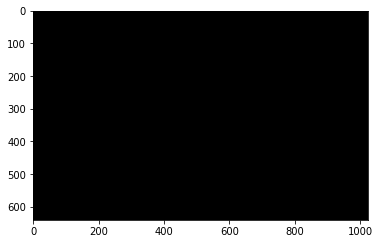

In [ ]:
import matplotlib.pyplot as plt
y1 = y[:,:,0]+y[:,:,1]
plt.imshow(y1, cmap = 'gray')
plt.show()

Proposed model with resnet50

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras import layers


def one_side_pad(x):
    x = ZeroPadding2D((1, 1))(x)
    x = Lambda(lambda x: x[:, :-1, :-1, :])(x)
    return x


def identity_block(input_tensor, kernel_size, filters, stage, block):
    filters1, filters2, filters3 = filters
    bn_axis = 3

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), 
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1),
               name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block,
               strides=(2, 2)):
    
    filters1, filters2, filters3 = filters
    bn_axis = 3
    

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1),  strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), 
               name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides, name=conv_name_base + '1')(input_tensor)
    
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


def get_resnet50_encoder(input_height=1024,  input_width=1024,
                         pretrained=None,
                         include_top=True, weights=None,
                         input_tensor=None, input_shape=None,
                         pooling=None,
                         image = None):

    assert input_height % 32 == 0
    assert input_width % 32 == 0

    
    img_input = Input(shape=(input_height, input_width, 3))
    #print(img_input.shape)
    bn_axis = 3
    
    x = ZeroPadding2D((3, 3))(img_input)
    x = Conv2D(64, (7, 7), 
               strides=(2, 2), name='conv1'+str(image))(x)


    x = BatchNormalization(axis=bn_axis, name='bn_conv1'+str(image))(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3),  strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a'+str(image), strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b'+str(image))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c'+str(image))
    

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a'+str(image))
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b'+str(image))
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c'+str(image))
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d'+str(image))

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a'+str(image))
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b'+str(image))
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c'+str(image))
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d'+str(image))
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e'+str(image))
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f'+str(image))

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a'+str(image))
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b'+str(image))
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c'+str(image))
    

    return img_input,x

def resnetencodeproposedmodel(shape=(1024,1024,3)):
    input1,features1 = get_resnet50_encoder(image = 1)
    input2,features2 = get_resnet50_encoder(image = 2)
    CONV5 = Concatenate()([features1, features2])

   
    up01 = UpSampling2D(size = (2,2))(CONV5)
    up02 = Conv2D(1024, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up01)
    up03 = Conv2D(1024, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up02)

    up11 = UpSampling2D(size = (2,2))(up03)
    up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)

    up21 = UpSampling2D(size = (2,2))(up13)
    up22 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up23 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

    up31 = UpSampling2D(size = (2,2))(up23)
    up32 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up33 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

    up41 = UpSampling2D(size = (2,2))(up33)
    up42 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up43 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)

    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input1,input2],outputs=[out])
    print(model.summary())
    return model
  
pleasebhagwan = resnetencodeproposedmodel()
pleasebhagwan.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//resnetencoder//proposed_resnet100.h5')

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 1030, 1030, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 1030, 1030, 3 0           input_4[0][0]                    
_______________________________________________________________________________________

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import *

x1 = cv2.imread("//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//A//A//val_7.png")
x2 = cv2.imread("//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//B//B//val_7.png")
g = cv2.imread("//content//drive//My Drive//CD_LEVIR_NEW//Matched1//val//label//label//val_7.png",0)
print(x1.shape)
a=np.reshape(x1,(1,1024,1024,3))
b=np.reshape(x2,(1,1024,1024,3))
y = pleasebhagwan.predict([a,b]) # please change
y = np.reshape(y,(1024,1024,2))
#g = cv2.imread('//content//drive//My Drive//SZTAKI_AirChange_Benchmark//Matched//resized//label//label//9.bmp',0)
result = np.argmax(y,axis = 2)
result = result*255.
result = np.uint8(result)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(result,kernel,iterations = 1)

print(g.shape)
print(result.shape)

gt=(g.ravel()/255).astype('int')
pd=(result.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (erosion.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

(1024, 1024, 3)
(1024, 1024)
(1024, 1024)
[0 1] [0 1]
F1 SCORE: 0.0
Kappa: -0.0005656680721943808
Accuracy: 0.8585424423217773
Jaccard Score: 0.0
Precision: 0.0
Recall: 0.0
[0 1] [0 1]
F1 SCORE: 0.0
Kappa: -0.0004439108023337468
Accuracy: 0.8586034774780273
Jaccard Score: 0.0
Precision: 0.0
Recall: 0.0


TypeError: ignored

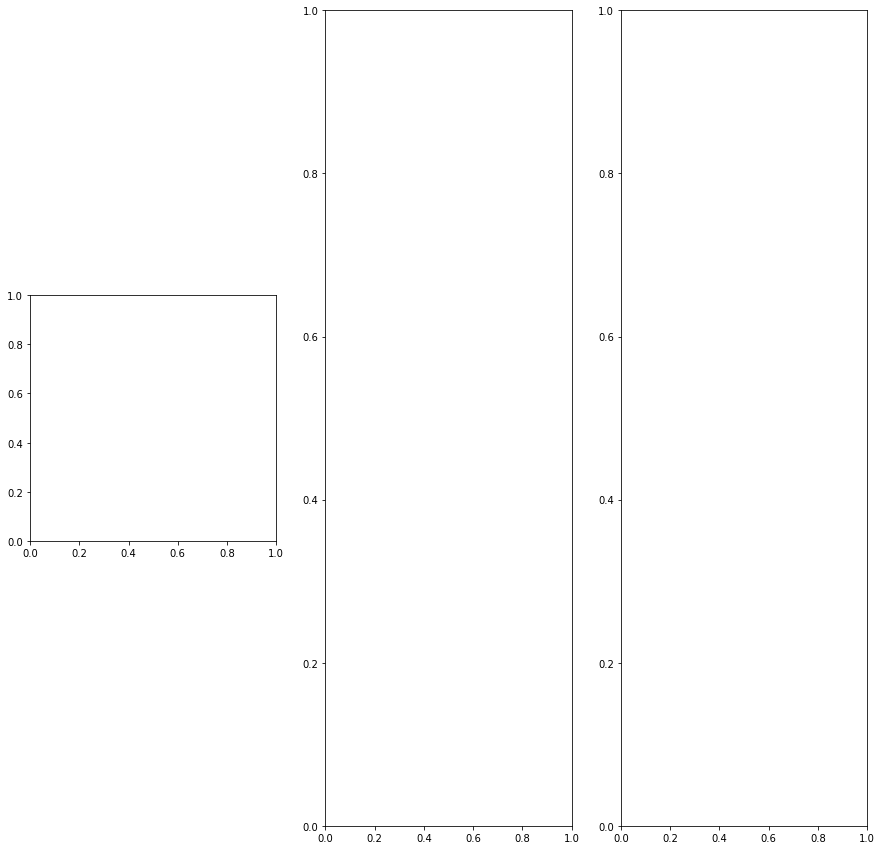

In [ ]:
gt = cv2.imread("//content//drive//My Drive//CD_LEVIR_NEW//Results//atrousbeforeconcatenate//label//label//val_7.png",0)
result = 
erosion = 
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
ax1.imshow(gt)
ax2.imshow(result)
ax3.imshow(erosion)
plt.show()

# Concatenate features with skip plus proposed 4

In [ ]:
#proposed model (concatenate -> aspp -> self attention)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import tensorflow as tf





def proposed5(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
 

    
    #VGG2
    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    


    CONV1 = Concatenate()([conv1, conv1_x])
    CONV2 = Concatenate()([conv2, conv2_x])
    CONV3 = Concatenate()([conv3, conv3_x])
    CONV5 = Concatenate(name = 'concat5')([conv4, conv4_x])

    #aspp
    #rate 6
    b1 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    b6 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b6' )(CONV5)
    b6 = Dropout(0.5)(b6)

    #rate 12
    b2 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(512, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(512, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)
    
    b7 = Conv2D(512, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b7' )(CONV5)
    b7 = Dropout(0.5)(b7)

    b5 = Add(name = 'add')([b1, b2, b3, b4, b6, b7])

    #self
    query = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'query')(b5)            #can change the factor to divide 
    key = Conv2D(512/8, 1, activation = 'relu',   padding = 'same', kernel_initializer = 'he_normal', name = 'key')(b5)
    value = Conv2D(512, 1, activation = 'relu',   padding = 'same', kernel_initializer = 'he_normal', name = 'value')(b5)

    query = Reshape([128*128, 64], name = 'reshape_q')(query)
    key = Reshape([64, 128*128], name = 'reshape_k')(key)
    value = Reshape([512, 128*128], name = 'reshape_v')(value)

    prod = tf.linalg.matmul(query,key)
    prod = prod*(64**-0.5)
    prod = Softmax(name = 'soft')(prod)

    attention = tf.linalg.matmul(value, prod)
    attention = Reshape([128,128,512], name = 'attention')(attention)

    attention = Add(name= 'add_1')([attention,b5])

    
    up21 = UpSampling2D(size = (2,2))(attention)
    merge1 = concatenate([CONV3,up21], axis = 3)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

    up31   = UpSampling2D(size = (2,2))(up23)
    merge2 = concatenate([CONV2,up31], axis = 3)
    up32   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge2)
    up32   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up32   = Dropout(0.2)(up32)
    up33   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

    up41 = UpSampling2D(size = (2,2))(up33)
    merge3 = concatenate([CONV1,up41], axis = 3)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge3)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

proposed4_skip = proposed5((1024,1024,3))
proposed4_skip.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_onlyskip//proposed5_30.h5')

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 1024, 1024, 6 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 1024, 1024, 6 1792        input_4[0][0]                    
_______________________________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_onlyskip//results//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposed4_skip.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_7.png
//content//drive//My Drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [[''],['proposed5(concatenatedfeatures) ','8sem_work//proposed_onlyskip//proposed5_30.h5','Wcceloss','New Custom','No',30,f1,precision,recall,kappa,jaccard,accuracy],
        ['proposed5(concatenatedfeatures) ','8sem_work//proposed_onlyskip//proposed5_30.h5','Wcceloss','New Custom','Yes',30,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Attention Skip(features are added) with proposed 4

In [ ]:
#proposed model (concatenate -> aspp -> self attention)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import tensorflow as tf


def attentionlayer(skip_layer,down_layer):
    inter_channel = skip_layer.get_shape().as_list()[3]
    theta_x = Conv2D(inter_channel, [1, 1], strides=[1, 1])(down_layer)
    phi_g = Conv2D(inter_channel, [1, 1], strides=[1, 1])(skip_layer)
    added = Activation('relu')(add([theta_x, phi_g]))
    psi = Conv2D(1, [1, 1], strides=[1, 1],activation="sigmoid")(added)
    multiplied = multiply([skip_layer, psi])
    return multiplied


def proposed5(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
 

    
    #VGG2
    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    


    CONV1 = Add()([conv1, conv1_x])
    CONV2 = Add()([conv2, conv2_x])
    CONV3 = Add()([conv3, conv3_x])
    CONV5 = Concatenate(name = 'concat5')([conv4, conv4_x])

    #aspp
    #rate 6
    b1 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    b6 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b6' )(CONV5)
    b6 = Dropout(0.5)(b6)

    #rate 12
    b2 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(512, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(512, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)
    
    b7 = Conv2D(512, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b7' )(CONV5)
    b7 = Dropout(0.5)(b7)

    b5 = Add(name = 'addlayer')([b1, b2, b3, b4, b6, b7])

    #self
    query = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'query')(b5)            #can change the factor to divide 
    key = Conv2D(512/8, 1, activation = 'relu',   padding = 'same', kernel_initializer = 'he_normal', name = 'key')(b5)
    value = Conv2D(512, 1, activation = 'relu',   padding = 'same', kernel_initializer = 'he_normal', name = 'value')(b5)

    query = Reshape([128*128, 64], name = 'reshape_q')(query)
    key = Reshape([64, 128*128], name = 'reshape_k')(key)
    value = Reshape([512, 128*128], name = 'reshape_v')(value)

    prod = tf.linalg.matmul(query,key)
    prod = prod*(64**-0.5)
    prod = Softmax(name = 'soft')(prod)

    attention = tf.linalg.matmul(value, prod)
    attention = Reshape([128,128,512], name = 'attention')(attention)

    attention = Add(name= 'add_new')([attention,b5])

    
    up21 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(attention))
    attn1 = attentionlayer(CONV3,up21)
    merge1 = concatenate([attn1,up21], axis = 3)

    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

    up31 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    attn2 = attentionlayer(CONV2,up31)
    merge2 = concatenate([attn2,up31], axis = 3)
    up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge2)
    up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

    up41 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    attn3 = attentionlayer(CONV1,up41)
    merge3 = concatenate([attn3,up41], axis = 3)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge3)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

proposed4_attentionskip = proposed5((1024,1024,3))
proposed4_attentionskip.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_skip_attention//proposed5_attention21.h5')

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_90 (Conv2D)              (None, 1024, 1024, 6 1792        input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 1024, 1024, 6 1792        input_8[0][0]                    
_______________________________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_skip_attention//results//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposed4_attentionskip.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_7.png
//content//drive//My Drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['proposed4_attentionskip(concatenatedfeatures) ','8sem_work//proposed_skip_attention//proposed5_attention21.h5','Wcceloss','New Custom','No',21,f1,precision,recall,kappa,jaccard,accuracy],
        ['proposed4_attentionskip(concatenatedfeatures) ','8sem_work//proposed_skip_attention//proposed5_attention21.h5','Wcceloss','New Custom','Yes',21,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Devishi Strided Convolution

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K



def proposed1withnomaxpooling(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    #pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Conv2D(64, 3, strides=2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)


    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = Conv2D(128, 3, strides=2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)


    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = Conv2D(256, 3, strides=2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)


    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    pool4 = Conv2D(512, 3, strides=2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)


    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding =  'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding =  'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = Conv2D(64, 3, strides=2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)


    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = Conv2D(64, 3, strides=2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)


    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = Conv2D(64, 3, strides=2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)


    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    pool4_x = Conv2D(64, 3, strides=2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)


    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
    conv5_x = Dropout(0.2)(conv5_x)
    conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    CONV5 = Concatenate()([conv5, conv5_x])
    up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(CONV5))
    up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
    up12 = Dropout(0.2)(up12)
    up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)
    up21 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up13))
    up22 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up31 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    up32 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    up32 = Dropout(0.2)(up32)
    up33 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up41 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    up42 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    #print(model.summary())
    return model
nomaxpooling = proposed1withnomaxpooling((512,512,3))
#tf.keras.utils.plot_model(socalledproposed, to_file='//content//drive//My Drive//CD_LEVIR_NEW//model_flowchart.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)
#socalledproposed.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//models//proposed70.h5")


In [ ]:
nomaxpooling.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposedIwithnomaxpooling//proposedIwithnomaxpooling512.h5')
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"

#savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_onlyskip//results//val_"
listofimages = [2]#,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = nomaxpooling.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

1
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_2.png


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 1] [0]
F1 SCORE: 0.0
Kappa: 0.0
Accuracy: 0.9746837615966797
Jaccard Score: 0.0
Precision: 0.0
Recall: 0.0
[0 1] [0]
F1 SCORE: 0.0
Kappa: 0.0
Accuracy: 0.9746837615966797
Jaccard Score: 0.0
Precision: 0.0
Recall: 0.0


# Siamese

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K

def siam_mod(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv3 = Conv2D(64, 5, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv4 = Conv2D(32, 5, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv5 = Conv2D(16, 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv4)

    input_2=Input(input_size)
    conv_1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv_2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv_1)
    conv_3 = Conv2D(64, 5, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv_2)
    conv_4 = Conv2D(32, 5, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv_3)
    conv_5 = Conv2D(16, 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv_4)

    out = Subtract()([conv5, conv_5])
    out = tf.norm(out, ord='euclidean', axis=-1, keepdims=None, name='norm')
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model
siamese = siam_mod((1024,1024,3))
#siamese.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//state-of-art//siamese_cdlevir.h5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1024, 1024, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 1024, 1024, 6 1792        input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
gtappend = []
predappend =[]
erodappend=[]

def crops(a, crop_size = 512): 
    croped_images = []    
    for i in range(2):
        for j in range(2):
            crop_x = a[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size]
            croped_images.append(crop_x)
        
    return croped_images
addA = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_"
savepred = "//content//drive//My Drive//CD_LEVIR_NEW//results//fcn//siam_"

#listofimages = glob.glob('//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//*.png')
listofimages = ['test_45.png','test_12.png','test_16.png','test_20.png']
print(len(listofimages))

for eg in listofimages:
  imageA = addA + eg.split('_')[-1]#str(eg) + ".png"
  imageB = addB + eg.split('_')[-1]#str(eg) + ".png"
  GT = addlabel + eg.split('_')[-1]#str(eg) + ".png"
  print(eg.split('_')[-1])
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = siamese.predict([a,b]) # please change
  result = np.reshape(y,(1024,1024))
  result[result<0.5] = 0
  result[result>0.5] = 1
  #result = np.argmax(y,axis = 2)
  result = result*255.
  cropped = crops(result)
  gtappend.append(cv2.imread(GT,0))
  for i in range(4):
        a = Image.fromarray(cropped[i])
        cv2.imwrite(savepred+eg.split('_')[-1].split('.')[0]+'_'+str(i)+'.png',cropped[i])


'''gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"

#savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_onlyskip//results//val_"
listofimages = [7]#,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = siamese.predict([a,b]) # please change
  result = np.reshape(y,(1024,1024))
  result[result<0.5] = 0
  result[result>0.5] = 1
  #result = np.argmax(y,axis = 2)
  result = result*255.
  print(np.unique(result))
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  plt.imshow(result)
  plt.show()
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)'''

4
45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_45.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_45.png
12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_12.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_12.png
16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_16.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_16.png
20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//A//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//B//test_20.png
//content//drive//My Drive//CD_LEVIR_NEW//Matched1//test//label//test_20.png


'gtappend = []\npredappend =[]\nerodappend=[]\naddA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"\naddB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"\naddlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"\n\n#savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_onlyskip//results//val_"\nlistofimages = [7]#,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]\nprint(len(listofimages))\n\nfor eg in listofimages:\n  imageA = addA + str(eg) + ".png"\n  imageB = addB + str(eg) + ".png"\n  GT = addlabel + str(eg) + ".png"\n  print(imageA)\n  print(imageB)\n  print(GT)\n  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A\n  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B\n  a=np.reshape(x1,(1,1024,1024,3))\n  b=np.reshape(x2,(1,1024,1024,3))\n  y = siamese.predict([a,b]) # please change\n  result = np.reshape(y,(1024,1024))\n  result[result<0.5] = 0\n  resu

In [ ]:
cv2.imwrite("//content//drive//My Drive//CD_LEVIR_NEW//state-of-art//siamese_7.png",result)

True

In [ ]:
def call_model(input_shape):
            input_size=(input_shape)
            input_1=Input(input_size)
            conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
            conv1 = Dropout(0.2)(conv1)
            conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
            pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
            conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
            conv2 = Dropout(0.2)(conv2)
            conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
            pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
            conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
            conv3 = Dropout(0.2)(conv3)
            conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
            pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
            conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
            conv3 = Dropout(0.2)(conv3)
            conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
            #pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

            #conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
            #conv4 = Dropout(0.2)(conv4)
            #conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
            #pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
            #conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
            #conv5 = Dropout(0.2)(conv5)
            #conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
            #model_1 = Model(inputs = input_1, outputs = conv5)

            #VGG2

            input_2=Input(input_size)
            conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
            conv1_x = Dropout(0.2)(conv1_x)
            conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
            pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
            conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
            conv2_x = Dropout(0.2)(conv2_x)
            conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
            pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
            conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
            conv3_x = Dropout(0.2)(conv3_x)
            conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
            pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
            conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
            conv3_x = Dropout(0.2)(conv3_x)
            conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
            #pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
            #conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
            #conv4_x = Dropout(0.2)(conv4_x)
            #conv4_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
            #pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
            #conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4_x)
            #conv5_x = Dropout(0.2)(conv5_x)
            #conv5_x = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5_x)
            #model_2 = Model(inputs = input_2,outputs = conv5_x)


            #CONV1 = Concatenate()([conv1, conv1_x])
            #CONV2 = Concatenate()([conv2, conv2_x])
            #CONV3 = Concatenate()([conv3, conv3_x])
            #CONV4 = Concatenate()([conv4, conv4_x])
            CONV5 = Concatenate(name = 'concat')([conv3, conv3_x])

            #aspp
            #rate 6
            b1 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
            b1 = Dropout(0.5)(b1)

            b6 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b6' )(CONV5)
            b6 = Dropout(0.5)(b6)

            #rate 12
            b2 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
            b2 = Dropout(0.5)(b2)

            #rate 18
            b3 = Conv2D(512, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
            b3 = Dropout(0.5)(b3)

            #rate 24
            b4 = Conv2D(512, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
            b4 = Dropout(0.5)(b4)
            
            b7 = Conv2D(512, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b7' )(CONV5)
            b7 = Dropout(0.5)(b7)

            b5 = Add(name = 'add')([b1, b2, b3, b4, b6, b7])

            #self
            query = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'query')(b5)            #can change the factor to divide 
            key = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'key')(b5)
            value = Conv2D(512, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'value')(b5)

            query = Reshape([128*128, 64], name = 'reshape_q')(query)
            key = Reshape([64, 128*128], name = 'reshape_k')(key)
            value = Reshape([512, 128*128], name = 'reshape_v')(value)

            prod = tf.linalg.matmul(query,key)
            prod = prod*(64**-0.5)
            prod = Softmax(name = 'soft')(prod)

            attention = tf.linalg.matmul(value, prod)
            attention = Reshape([128,128,512], name = 'attention')(attention)

            attention = Add(name= 'add_1')([attention,b5])

            #changed the kernel size to 3*3 from 2*2, added one extra conv also

            #up11 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(b5))
            #up12 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up11)
            #up12 = Dropout(0.2)(up12)
            #up13 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up12)

            up21 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(attention))
            up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
            up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

            up22 = Dropout(0.2)(up22)
            up23 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
            up31 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
            up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
            up32 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

            up32 = Dropout(0.2)(up32)
            up33 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
            up41 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
            up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
            up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)

            up42 = Dropout(0.2)(up42)
            up43 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
            
            out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
            
            model = Model(inputs=[input_1,input_2],outputs=[out])

            return model

trymodel = call_model((1024,1024,3))
trymodel.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//attention//aspp_attention50_again.h5")

1
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_7.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_7.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_7.png
[  0. 255.]


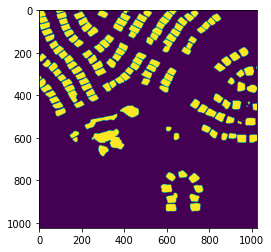

In [ ]:
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"

#savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_onlyskip//results//val_"
listofimages = [7]#,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = trymodel.predict([a,b]) # please change
  result = np.reshape(y,(1024,1024,2))
  #result[result<0.5] = 0
  #result[result>0.5] = 1
  result = np.argmax(result,axis = 2)
  result = result*255.
  print(np.unique(result))
  #cv2.imwrite(savepred+str(eg)+".png",result)
  #cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  plt.imshow(result)
  plt.show()
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  #cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


# Leaky ReLU

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K



def proposedILeakyrelu(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = LeakyReLU()(Conv2D(64, 3,  padding = 'same', kernel_initializer = 'he_normal')(input_1))
    conv1 = Dropout(0.2)(conv1)
    conv1 = LeakyReLU()(Conv2D(64, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv1))
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = LeakyReLU()(Conv2D(128, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool1))
    conv2 = Dropout(0.2)(conv2)
    conv2 = LeakyReLU()(Conv2D(128, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv2))
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = LeakyReLU()(Conv2D(256, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2))
    conv3 = Dropout(0.2)(conv3)
    conv3 = LeakyReLU()(Conv2D(256, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv3))
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = LeakyReLU()(Conv2D(512, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool3))
    conv4 = Dropout(0.2)(conv4)
    conv4 = LeakyReLU()(Conv2D(512, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv4))
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = LeakyReLU()(Conv2D(512, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool4))
    conv5 = Dropout(0.2)(conv5)
    conv5 = LeakyReLU()(Conv2D(512, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv5))
    #model_1 = Model(inputs = input_1, outputs = conv5)

    #VGG2

    input_2=Input(input_size)
    conv1_x = LeakyReLU()(Conv2D(64, 3,  padding =  'same', kernel_initializer = 'he_normal')(input_2))
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = LeakyReLU()(Conv2D(64, 3,  padding =  'same', kernel_initializer = 'he_normal')(conv1_x))
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = LeakyReLU()(Conv2D(128, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool1_x))
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = LeakyReLU()(Conv2D(128, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv2_x))
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = LeakyReLU()(Conv2D(256, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2_x))
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = LeakyReLU()(Conv2D(256, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv3_x))
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = LeakyReLU()(Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(pool3_x))
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = LeakyReLU()(Conv2D(512, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv4_x))
    pool4_x = MaxPooling2D(pool_size=(2, 2))(conv4_x)
    conv5_x = LeakyReLU()(Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(pool4_x))
    conv5_x = Dropout(0.2)(conv5_x)
    conv5_x = LeakyReLU()(Conv2D(512, 3,  padding = 'same', kernel_initializer = 'he_normal')(conv5_x))
    #model_2 = Model(inputs = input_2,outputs = conv5_x)


    #CONV1 = Concatenate()([conv1, conv1_x])
    #CONV2 = Concatenate()([conv2, conv2_x])
    #CONV3 = Concatenate()([conv3, conv3_x])
    #CONV4 = Concatenate()([conv4, conv4_x])
    CONV5 = Concatenate()([conv5, conv5_x])
    up11 = LeakyReLU()(Conv2D(512, 2,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(CONV5)))
    up12 = LeakyReLU()(Conv2D(512, 2,  padding = 'same', kernel_initializer = 'he_normal')(up11))
    up12 = Dropout(0.2)(up12)
    up13 = LeakyReLU()(Conv2D(512, 2,  padding = 'same', kernel_initializer = 'he_normal')(up12))
    up21 = LeakyReLU()(Conv2D(256, 2,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up13)))
    up22 = LeakyReLU()(Conv2D(256, 2,  padding = 'same', kernel_initializer = 'he_normal')(up21))
    up22 = Dropout(0.2)(up22)
    up23 = LeakyReLU()(Conv2D(256, 2,  padding = 'same', kernel_initializer = 'he_normal')(up22))
    up31 = LeakyReLU()(Conv2D(128, 2,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23)))
    up32 = LeakyReLU()(Conv2D(128, 2,  padding = 'same', kernel_initializer = 'he_normal')(up31))
    up32 = Dropout(0.2)(up32)
    up33 = LeakyReLU()(Conv2D(128, 2,  padding = 'same', kernel_initializer = 'he_normal')(up32))
    up41 = LeakyReLU()(Conv2D(64, 2,  padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33)))
    up42 = LeakyReLU()(Conv2D(64, 2,  padding = 'same', kernel_initializer = 'he_normal')(up41))
    up42 = Dropout(0.2)(up42)
    up43 = LeakyReLU()(Conv2D(64, 2,  padding = 'same', kernel_initializer = 'he_normal')(up42))
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model
LR = proposedILeakyrelu((1024,1024,3))
#tf.keras.utils.plot_model(socalledproposed, to_file='//content//drive//My Drive//CD_LEVIR_NEW//model_flowchart.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)
#socalledproposed.load_weights("//content//drive//My Drive//CD_LEVIR_NEW//models//proposed70.h5")

In [ ]:
LR.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposedI_LR//ProposedI_LeakyRelu.h5')
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposedI_LR//results//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = LR.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

# Add features skip


In [ ]:
#proposed model (concatenate -> aspp -> self attention)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import tensorflow as tf


def proposed5(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
 

    
    #VGG2
    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    


    CONV1 = Add()([conv1, conv1_x])
    CONV2 = Add()([conv2, conv2_x])
    CONV3 = Add()([conv3, conv3_x])

    CONV5 = Concatenate(name = 'concat5')([conv4, conv4_x])

    #aspp
    #rate 6
    b1 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    b6 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b6' )(CONV5)
    b6 = Dropout(0.5)(b6)

    #rate 12
    b2 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(512, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(512, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)
    
    b7 = Conv2D(512, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b7' )(CONV5)
    b7 = Dropout(0.5)(b7)

    b5 = Add(name = 'add1')([b1, b2, b3, b4, b6, b7])

    #self
    query = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'query')(b5)            #can change the factor to divide 
    key = Conv2D(512/8, 1, activation = 'relu',   padding = 'same', kernel_initializer = 'he_normal', name = 'key')(b5)
    value = Conv2D(512, 1, activation = 'relu',   padding = 'same', kernel_initializer = 'he_normal', name = 'value')(b5)

    query = Reshape([128*128, 64], name = 'reshape_q')(query)
    key = Reshape([64, 128*128], name = 'reshape_k')(key)
    value = Reshape([512, 128*128], name = 'reshape_v')(value)

    prod = tf.linalg.matmul(query,key)
    prod = prod*(64**-0.5)
    prod = Softmax(name = 'soft')(prod)

    attention = tf.linalg.matmul(value, prod)
    attention = Reshape([128,128,512], name = 'attention')(attention)

    attention = Add()([attention,b5])

    
    up21 = UpSampling2D(size = (2,2))(attention)
    up21 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up21)
    merge1 = concatenate([CONV3,up21], axis = 3)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

    up31   = UpSampling2D(size = (2,2))(up23)
    up31 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up31)
    merge2 = concatenate([CONV2,up31], axis = 3)
    up32   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge2)
    up32   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up32   = Dropout(0.2)(up32)
    up33   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

    up41 = UpSampling2D(size = (2,2))(up33)
    up41 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up41)
    merge3 = concatenate([CONV1,up41], axis = 3)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge3)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

proposed4_skip = proposed5((1024,1024,3))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1024, 1024, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 1024, 1024, 6 1792        input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
proposed4_skip.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_add_skip//add_skip2.h5')
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_add_skip//results//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposed4_skip.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_7.png
//content//drive//My Drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['proposed4skip(addedfeatures) ','8sem_work//proposed_add_skip//add_skip2.h5','Wcceloss','New Custom','No',64,f1,precision,recall,kappa,jaccard,accuracy],
        ['proposed4skip(addedfeatures) ','8sem_work//proposed_add_skip//add_skip2.h5','Wcceloss','New Custom','Yes',64,f11,precision1,recall1,kappa1,jaccard1,accuracy1]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# Concatenated features with skip proposed 4

In [ ]:
#proposed model (concatenate -> aspp -> self attention)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
import tensorflow as tf





def proposed5(input_shape):
    input_size=(input_shape)
    input_1=Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
 

    
    #VGG2
    input_2=Input(input_size)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_2)
    conv1_x = Dropout(0.2)(conv1_x)
    conv1_x = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_x)
    pool1_x = MaxPooling2D(pool_size=(2, 2))(conv1_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1_x)
    conv2_x = Dropout(0.2)(conv2_x)
    conv2_x = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2_x)
    pool2_x = MaxPooling2D(pool_size=(2, 2))(conv2_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2_x)
    conv3_x = Dropout(0.2)(conv3_x)
    conv3_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3_x)
    pool3_x = MaxPooling2D(pool_size=(2, 2))(conv3_x)
    conv4_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3_x)
    conv4_x = Dropout(0.2)(conv4_x)
    conv4_x = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_x)
    


    CONV1 = Concatenate()([conv1, conv1_x])
    CONV2 = Concatenate()([conv2, conv2_x])
    CONV3 = Concatenate()([conv3, conv3_x])
    CONV5 = Concatenate(name = 'concat5')([conv4, conv4_x])

    #aspp
    #rate 6
    b1 = Conv2D(512, 3, dilation_rate=(4, 4), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b1' )(CONV5)
    b1 = Dropout(0.5)(b1)

    b6 = Conv2D(512, 3, dilation_rate=(6, 6), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b6' )(CONV5)
    b6 = Dropout(0.5)(b6)

    #rate 12
    b2 = Conv2D(512, 3, dilation_rate=(8, 8), activation='relu', padding = 'same', kernel_initializer = 'he_normal' , name = 'b2')(CONV5)
    b2 = Dropout(0.5)(b2)

    #rate 18
    b3 = Conv2D(512, 3, dilation_rate=(12, 12), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b3' )(CONV5)
    b3 = Dropout(0.5)(b3)

    #rate 24
    b4 = Conv2D(512, 3, dilation_rate=(16, 16), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name = 'b4' )(CONV5)
    b4 = Dropout(0.5)(b4)
    
    b7 = Conv2D(512, 3, dilation_rate=(18, 18), activation='relu', padding = 'same', kernel_initializer = 'he_normal', name ='b7' )(CONV5)
    b7 = Dropout(0.5)(b7)

    b5 = Add(name = 'add')([b1, b2, b3, b4, b6, b7])

    #self
    query = Conv2D(512/8, 1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name = 'query')(b5)            #can change the factor to divide 
    key = Conv2D(512/8, 1, activation = 'relu',   padding = 'same', kernel_initializer = 'he_normal', name = 'key')(b5)
    value = Conv2D(512, 1, activation = 'relu',   padding = 'same', kernel_initializer = 'he_normal', name = 'value')(b5)

    query = Reshape([128*128, 64], name = 'reshape_q')(query)
    key = Reshape([64, 128*128], name = 'reshape_k')(key)
    value = Reshape([512, 128*128], name = 'reshape_v')(value)

    prod = tf.linalg.matmul(query,key)
    prod = prod*(64**-0.5)
    prod = Softmax(name = 'soft')(prod)

    attention = tf.linalg.matmul(value, prod)
    attention = Reshape([128,128,512], name = 'attention')(attention)

    attention = Add(name= 'add_1')([attention,b5])

    
    up21 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(attention))
    merge1 = concatenate([CONV3,up21], axis = 3)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up22 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)
    up22 = Dropout(0.2)(up22)
    up23 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up22)

    up31   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up23))
    merge2 = concatenate([CONV2,up31], axis = 3)
    up32   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge2)
    up32   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)
    up32   = Dropout(0.2)(up32)
    up33   = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up32)

    up41 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(up33))
    merge3 = concatenate([CONV1,up41], axis = 3)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge3)
    up42 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    up42 = Dropout(0.2)(up42)
    up43 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up42)
    
    out = Conv2D(2, 1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(up43)
    
    model = Model(inputs=[input_1,input_2],outputs=[out])
    print(model.summary())
    return model

proposed4_skip_concatenate = proposed5((1024,1024,3))

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 1024, 1024, 6 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 1024, 1024, 6 1792        input_4[0][0]                    
_______________________________________________________________________________________

In [ ]:
proposed4_skip_concatenate.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_onlyskip//proposed5featuresconcatenated.h5')
gtappend = []
predappend =[]
erodappend=[]
addA = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_"
addB = "//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_"
addlabel = "//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_"

savepred = "//content//drive//My Drive//CD_LEVIR_NEW//8sem_work//proposed_onlyskip//results2//val_"
listofimages = [2,3,4,6,7,8,9,17,18,19,20,26,27,28,30,32,34,43,46,47,51,52,53,54,55,58,60,61,62,63]
print(len(listofimages))

for eg in listofimages:
  imageA = addA + str(eg) + ".png"
  imageB = addB + str(eg) + ".png"
  GT = addlabel + str(eg) + ".png"
  print(imageA)
  print(imageB)
  print(GT)
  x1  = cv2.imread(imageA)/255.0 #Bitemporal Image A
  x2  = cv2.imread(imageB)/255.0 #Bitemporal image B
  a=np.reshape(x1,(1,1024,1024,3))
  b=np.reshape(x2,(1,1024,1024,3))
  y = proposed4_skip_concatenate.predict([a,b]) # please change
  y = np.reshape(y,(1024,1024,2))
  
  result = np.argmax(y,axis = 2)
  result = result*255.
  cv2.imwrite(savepred+str(eg)+".png",result)
  cv2.imwrite(savepred + str(eg) + "_gt.png",cv2.imread(GT,0))
  predappend.append(result)
  result = np.uint8(result)
  
  kernel = np.ones((3,3),np.uint8)
  erosion = cv2.erode(result,kernel,iterations = 1)
  cv2.imwrite(savepred + str(eg) + "_erod.png",erosion)
  gtappend.append(cv2.imread(GT,0))
  erodappend.append(erosion)


  
#withoutskipvalresults
e = np.stack(erodappend, axis=0)
g = np.stack(gtappend, axis=0)
p = np.stack(predappend, axis=0)


from sklearn.metrics import *
gt=(g.ravel()/255).astype('int')
pd=(p.ravel()/255).astype('int')
f1 = f1_score(gt,pd)
kappa = cohen_kappa_score(gt,pd)
accuracy = accuracy_score(gt,pd) 
jaccard = jaccard_score(gt,pd)
precision = precision_score(gt,pd) 
recall = recall_score(gt,pd)
print(np.unique(gt),np.unique(pd))
print("F1 SCORE:", f1)
print("Kappa:",kappa)
print("Accuracy:",accuracy)
print("Jaccard Score:",jaccard)
print("Precision:",precision)
print("Recall:",recall)


er = (e.ravel()/255).astype('int')
f11 = f1_score(gt,er)
kappa1 = cohen_kappa_score(gt,er)
accuracy1 = accuracy_score(gt,er) 
jaccard1 = jaccard_score(gt,er)
precision1 = precision_score(gt,er) 
recall1 = recall_score(gt,er)
print(np.unique(gt),np.unique(er))
print("F1 SCORE:", f11)
print("Kappa:",kappa1)
print("Accuracy:",accuracy1)
print("Jaccard Score:",jaccard1)
print("Precision:",precision1)
print("Recall:",recall1)

30
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_2.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_3.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_4.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//B//B//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//val//labelnew//label//val_6.png
//content//drive//My Drive//CD_LEVIR_NEW//no_augment//val//A//A//val_7.png
//content//drive//My Drive

In [ ]:
csvpath = "//content//drive//My Drive//CD_LEVIR_NEW//ResultsforReport//scoresforreport.csv"
#head = [['Modeltype','Modelpath','Loss','Validationset','Erosion','Epochs','F1','Precision','Recall','Kappa','Jaccard','Accuracy']]
data = [['proposed5(concatenatedfeatures) ','8sem_work//proposed_onlyskip//proposed5featuresconcatenated.h5','Wcceloss','New Custom','No',58,f1,precision,recall,kappa,jaccard,accuracy],
        ['proposed5(concatenatedfeatures) ','8sem_work//proposed_onlyskip//proposed5featuresconcatenated.h5','Wcceloss','New Custom','Yes',58,f11,precision1,recall1,kappa1,jaccard1,accuracy1],
        ['Siamese ','state-of-art//siamese_cdlevir.h5','_',7,'No','_',0.62,0.53,0.75,0.54,0.45,0.87],
        ['Siamese ','state-of-art//siamese_cdlevir.h5','_',7,'Yes','_',0.63,0.68,0.53,0.57,0.46,0.90]]
with open(csvpath, 'a') as f:
    writer = csv.writer(f)
    writer.writerows(data)

# FDCNN

In [ ]:
def get_conv_filter(data_dict, name):
        return tf.constant(data_dict[name]['weights'], name="filter")

    
def get_bias(data_dict, name):
        return tf.constant(data_dict[name]['bias'], name="biases")

def get_fc_weight(data_dict, name):
        return tf.constant(data_dict[name]['weights'], name="weights")


def avg_pool(bottom, name):
        return tf.nn.avg_pool(bottom, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name=name)

def max_pool(bottom, name):
        return tf.nn.max_pool(bottom, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name=name)

def conv_layer(bottom, name, data_dict):
            filt = get_conv_filter(data_dict, name)
            bottom = tf.cast(bottom, dtype = 'float64')
            filt = tf.cast(filt, dtype ='float64')
            conv = tf.nn.conv2d(bottom, filt, [1, 1, 1, 1], padding='SAME')

            conv_biases = get_bias(data_dict, name)
            conv_biases = tf.cast(conv_biases, dtype = 'float64')
            bias = tf.nn.bias_add(conv, conv_biases)

            relu = tf.nn.relu(bias)
            return relu

def fc_layer(bottom, name, data_dict):
            shape = bottom.get_shape().as_list()
            dim = 1
            for d in shape[1:]:
                dim *= d
            x = tf.reshape(bottom, [-1, dim])
            bottom = tf.cast(bottom, dtype = 'float64')
            weights = get_fc_weight(data_dict, name)
            biases = get_bias(data_dict, name)
            weights = tf.cast(weights, dtype = 'float64')
            biases = tf.cast(biases, dtype = 'float64')
            # Fully connected layer. Note that the '+' operation automatically
            # broadcasts the biases.
            fc = tf.nn.bias_add(tf.matmul(x, weights), biases)

            return fc

def Vgg16(rgb):
        data_dict = np.load('/content/drive/MyDrive/CD_LEVIR_NEW/state-of-art/fdcnn/saved_model/kit_imagenet.npy', allow_pickle = True).item()
        print("npy file loaded") 
        rgb_scaled = rgb * 255.0
        rgb_scaled = tf.cast(rgb_scaled, dtype = 'float64')
        red, green, blue = tf.split(axis=3, num_or_size_splits=3, value=rgb_scaled)
        bgr = tf.concat(axis=3, values=[blue, green ,red])

        conv1_1 = conv_layer(bgr, "conv1_1", data_dict)
        conv1_1 = conv_layer(bgr, "conv1_1", data_dict)
        conv1_2 = conv_layer(conv1_1, "conv1_2", data_dict)
        pool1 = max_pool(conv1_2, 'pool1')

        conv2_1 = conv_layer(pool1, "conv2_1", data_dict)
        conv2_2 = conv_layer(conv2_1, "conv2_2", data_dict)
        pool2 =max_pool(conv2_2, 'pool2')

        conv3_1 = conv_layer(pool2, "conv3_1", data_dict)
        conv3_2 = conv_layer(conv3_1, "conv3_2", data_dict)
        conv3_3 = conv_layer(conv3_2, "conv3_3", data_dict)
        pool3 = max_pool(conv3_3, 'pool3')

        conv4_1 = conv_layer(pool3, "conv4_1", data_dict)
        conv4_2 = conv_layer(conv4_1, "conv4_2", data_dict)
        conv4_3 = conv_layer(conv4_2, "conv4_3", data_dict)
        pool4 = max_pool(conv4_3, 'pool4')

        conv5_1 = conv_layer(pool4, "conv5_1", data_dict)
        conv5_2 = conv_layer(conv5_1, "conv5_2", data_dict)
        conv5_3 = conv_layer(conv5_2, "conv5_3", data_dict)
        pool5 = max_pool(conv5_3, 'pool5')

        fc6_1 = fc_layer(pool5, "fc6_1", data_dict)
        assert fc6_1.get_shape().as_list()[1:] == [4096]
        relu6 = tf.nn.relu(fc6_1)

        fc7_1 = fc_layer(relu6, "fc7_1", data_dict)
        relu7 = tf.nn.relu(fc7_1)

        fc8_1 = fc_layer(relu7, "fc8_1", data_dict)

        prob = tf.nn.softmax(fc8_1, name="prob")

        data_dict = None
        return(conv1_2, conv2_2,conv3_3)

#fdcnn model 

from keras.models import *
from keras.layers import *
import numpy as np
import tensorflow as tf

def fdcnn(input_shape):
  ip1=Input(input_shape)
  ip2 = Input(input_shape)
  '''
  vgg = Vgg16()
  vgg.build(img1)
  f1_1 = vgg.conv1_2
  f1_2 = vgg.conv2_2
  f1_3 = vgg.conv3_3
  print(f1_1.shape, f1_2.shape, f1_3.shape)

  vgg = Vgg16()
  vgg.build(img2)
  f2_1 = vgg.conv1_2
  f2_2 = vgg.conv2_2
  f2_3 = vgg.conv3_3
  print(f2_1.shape, f2_2.shape, f2_3.shape)
  '''
  f1_1, f1_2,f1_3 = Vgg16(ip1)
  print(f1_1.shape, f1_2.shape, f1_3.shape)
  f2_1, f2_2,f2_3 = Vgg16(ip2)
  fd1 = f1_1 - f2_1
  fd2 = f1_2 - f2_2
  fd3 = f1_3 - f2_3
  fd4 = ip1 - ip2
  up1 = UpSampling2D(size = (2,2))(fd2)
  up2 = UpSampling2D(size = (4,4))(fd3)
  fd1 = tf.cast(fd1, dtype = 'float64')
  up1 = tf.cast(up1, dtype = 'float64')
  up2 = tf.cast(up2, dtype = 'float64')
  fd4 = tf.cast(fd4, dtype = 'float64')
  concat = tf.concat([fd4, fd1, up1, up2], axis = -1)

  ot1 = Conv2D(30,1, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal' )(concat)
  ot2 = Conv2D(2,1, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(ot1)

  model = Model(inputs=[ip1,ip2],outputs=[ot2])
  print(model.summary())
  return model


fdcnn = fdcnn((224,224,3))
fdcnn.load_weights('//content//drive//My Drive//CD_LEVIR_NEW//state-of-art//fdcnn.h5')

npy file loaded
(None, 224, 224, 64) (None, 112, 112, 128) (None, 56, 56, 256)
npy file loaded
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
tf.math.multiply (TFOpLambda)   (None, 224, 224, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
tf.math.multiply_1 (TFOpLambda) (None, 224, 224, 3)  0           input_16[0][0]                 

test_16_0
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//a//test_16_0.png
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//b//test_16_0.png
(224, 224)


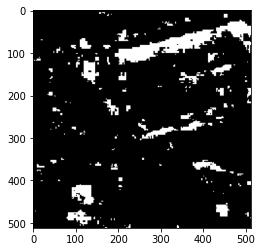

test_20_1
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//a//test_20_1.png
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//b//test_20_1.png
(224, 224)


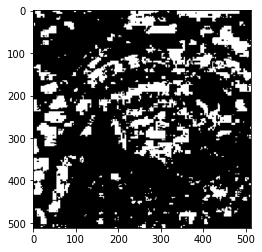

test_2_3
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//a//test_2_3.png
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//b//test_2_3.png
(224, 224)


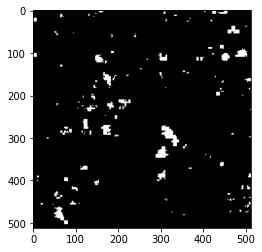

test_45_2
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//a//test_45_2.png
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//b//test_45_2.png
(224, 224)


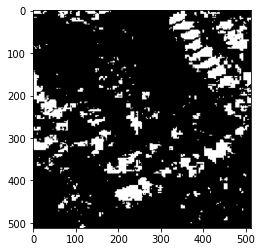

test_12_3
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//a//test_12_3.png
//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//b//test_12_3.png
(224, 224)


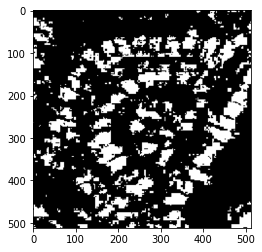

In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np

gtappend   = []
predappend = []
erodappend = []

i=0
addA = "//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//a//"
addB = "//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//b//"
#addlabel = "//content//drive//MyDrive//SZTAKI_AirChange_Benchmark//Matched//augment//label//label//"
path = "//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//"

q = glob.glob('//content//drive//MyDrive//CD_LEVIR_NEW//state-of-art//a//*.png')
#savepath = "results//prop5//"
for eg in q:
  eg = eg.split("/")[-1]
  eg = eg.split(".")[0]
  #print(eg)
  #eg = eg[2:]
  print(eg)
  imageA = addA + eg + '.png'
  imageB = addB + eg+ '.png' 
  print(imageA)
  print(imageB)
  x1 =  Image.open(imageA)
  new_width  = 224
  new_height = 224
  x1 = x1.resize((new_width, new_height), Image.ANTIALIAS)

  x2 =  Image.open(imageB)
  x2 = x2.resize((new_width, new_height), Image.ANTIALIAS)

  #gt = gt.resize((new_width, new_height), Image.ANTIALIAS)
  #print(np.array(x1).shape)
  a=np.reshape(x1,(1,224,224,3))
  b=np.reshape(x2,(1,224,224,3))
  y = fdcnn.predict([a,b]) # please change
  y = np.reshape(y,(224,224,2))
  result = np.argmax(y,axis = 2).astype('uint8')  
  print(result.shape)
  result = result*255.
  x = Image.fromarray(result)
  x = x.resize((512, 512), Image.NEAREST)
  #x.save(path+eg+'_pred.bmp')
  x = np.array(x)
  cv2.imwrite(path+eg+'_fdcnn.png',x)
  
  i=i+1
  #deep = Image.fromarray(result)
  #deep.save(savepath+"pred_"+eg+'.png')
  #cv2.imwrite(savepath+eg+'_pred.png',result)

  plt.imshow(x,cmap='gray')
  plt.show()

#e = np.stack(erodappend, axis=0)

  